9.892207675304299
45.895086027643245
-80.09050030012357
45.4645875950135
7.0984035991790515


Text(0, 0.5, 'omega / (deg / s)')

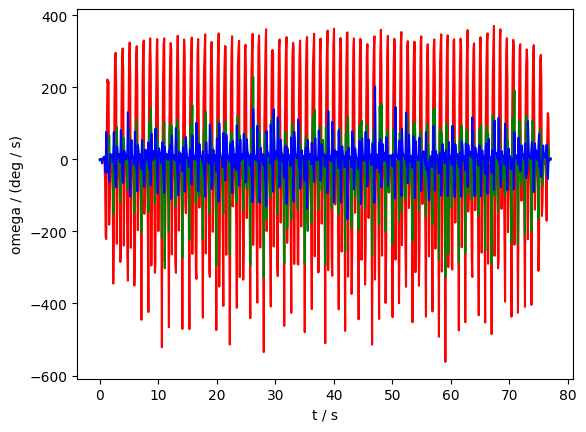

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#sf = 0.1
#timestamp = np.linspace(0, 100, num=1000)
#timestamp = [round(element,1) for element in timestamp]
#print(timestamp)

millis = []
x_acceleration = []
y_acceleration = []
z_acceleration = []
x_a_velocity = []
y_a_velocity = []
z_a_velocity = []

f = open("./../Measurements/100m_02.txt","r")

# Convert from raw data into m/(s^2) and deg/s
for line in f:
    line = line.split()
    millis.append(int(line[1]))
    x_acceleration.append(int(line[3])/4096*9.81)
    y_acceleration.append(int(line[5])/4096*9.81)
    z_acceleration.append(int(line[7])/4096*9.81)
    x_a_velocity.append(int(line[9])/(65536/4000))
    y_a_velocity.append(int(line[11])/(65536/4000))
    z_a_velocity.append(int(line[13])/(65536/4000))

f.close()

start_millis = millis[0]
s_normalized = [(x - start_millis)/1000 for x in millis]

i = 0
x_acceleration_stationary = 0
y_acceleration_stationary = 0
z_acceleration_stationary = 0

while i < 10:
    x_acceleration_stationary += x_acceleration[i]
    y_acceleration_stationary += y_acceleration[i]
    z_acceleration_stationary += z_acceleration[i]
    i+=1

x_acceleration_stationary /= i
y_acceleration_stationary /= i
z_acceleration_stationary /= i

# Spherical coordinate system
d = np.sqrt(pow(x_acceleration_stationary,2)+pow(y_acceleration_stationary,2))
g = np.sqrt(pow(x_acceleration_stationary,2)+pow(y_acceleration_stationary,2)+pow(z_acceleration_stationary,2))
initial_theta = np.arcsin(d/g)
initial_phi = np.arcsin(y_acceleration_stationary/d)
print(g)
print(initial_theta*(360/(2*np.pi))) # in degree
print(initial_phi*(360/(2*np.pi)))

# Euler angles
initial_theta_x = np.arctan(-y_acceleration_stationary/z_acceleration_stationary)
initial_theta_y = - np.arctan((-x_acceleration_stationary)/(np.sqrt((pow(-y_acceleration_stationary,2)+pow(z_acceleration_stationary,2)))))
print(initial_theta_x*(360/(2*np.pi))) # in degree
print(initial_theta_y*(360/(2*np.pi)))

plt.plot(s_normalized, x_a_velocity,'r')
plt.plot(s_normalized, y_a_velocity,'g')
plt.plot(s_normalized, z_a_velocity,'b')
plt.xlabel("t / s")
plt.ylabel("omega / (deg / s)")

Text(0.5, 0, 't / s')

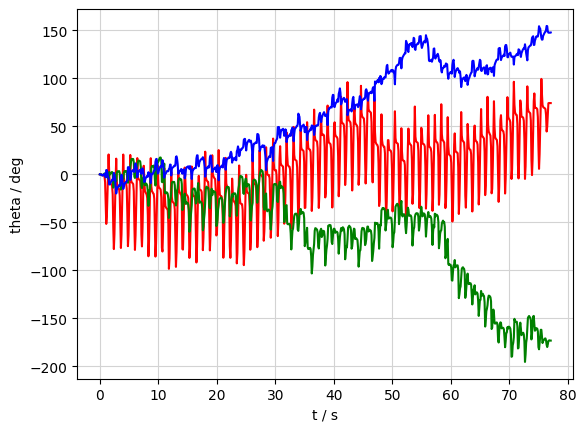

In [2]:
i = 1
x_a_displacement = [0] * len(x_a_velocity)
y_a_displacement = [0] * len(y_a_velocity)
z_a_displacement = [0] * len(z_a_velocity)

while i<len(x_a_velocity):
    x_a_displacement[i] = x_a_velocity[i] * (s_normalized[i]-s_normalized[i-1])
    y_a_displacement[i] = y_a_velocity[i] * (s_normalized[i]-s_normalized[i-1])
    z_a_displacement[i] = z_a_velocity[i] * (s_normalized[i]-s_normalized[i-1])
    i+=1

x_angle = np.cumsum(x_a_displacement)
y_angle = np.cumsum(y_a_displacement)
z_angle = np.cumsum(z_a_displacement)

x_angle_t = sum(x_a_displacement)
y_angle_t = sum(y_a_displacement)
z_angle_t = sum(z_a_displacement)

plt.plot(s_normalized, x_angle, 'r')
plt.plot(s_normalized, y_angle, 'g')
plt.plot(s_normalized, z_angle, 'b')
plt.grid(which="major", color="lightgray", linestyle="solid")
plt.ylabel("theta / deg")
plt.xlabel("t / s")